In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.path.append('../')

In [3]:
from IPython.display import clear_output
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

/tmp/ipykernel_19051/2021024302.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# schedule = pd.DataFrame(columns=pd.MultiIndex.from_product([range(3), ['s','e']]), index=range(6))

In [5]:
from pyosrd.schedules import Schedule
schedule = Schedule(6,3)
schedule.df

0         1         2     
     s    e    s    e    s    e
0  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN

In [6]:
schedule.df.at[0, 0] =  [0, 1]
schedule.df.at[2, 0] =  [1, 2]
schedule.df.at[3, 0] =  [2, 3]
schedule.df.at[4, 0] =  [3, 4]
schedule.df.at[6, 0] =  [4, 5]

schedule.df.at[1, 1] =  [1, 2]
schedule.df.at[2, 1] =  [2, 3]
schedule.df.at[3, 1] =  [3, 4]
schedule.df.at[4, 1] =  [4, 5]
schedule.df.at[5, 1] =  [5, 6]

schedule.df.at[0, 2] =  [2, 3]
schedule.df.at[2, 2] =  [3, 4]
schedule.df.at[3, 2] =  [4, 5]
schedule.df.at[4, 2] =  [5, 6]
schedule.df.at[6, 2] =  [6, 7]

schedule._df.index = 'ZONE' + schedule._df.index.astype(str)

In [7]:
schedule.df

0         1         2     
         s    e    s    e    s    e
ZONE0    0    1  NaN  NaN    2    3
ZONE1  NaN  NaN    1    2  NaN  NaN
ZONE2    1    2    2    3    3    4
ZONE3    2    3    3    4    4    5
ZONE4    3    4    4    5    5    6
ZONE5  NaN  NaN    5    6  NaN  NaN
ZONE6    4    5  NaN  NaN    6    7

In [8]:
schedule.durations

,0,1,2
ZONE0,1.0,NaN,1.0
ZONE1,NaN,1.0,NaN
ZONE2,1.0,1.0,1.0
ZONE3,1.0,1.0,1.0
ZONE4,1.0,1.0,1.0
ZONE5,NaN,1.0,NaN
ZONE6,1.0,NaN,1.0


/home/renan/RLway/src/pyosrd/schedules/schedules.py:430: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for u, v in zip(self.df.index, self.df.fillna(0).values)


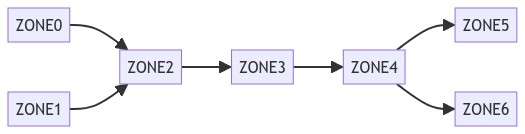

In [9]:
schedule.draw_graph()

<Axes: xlabel='Time'>

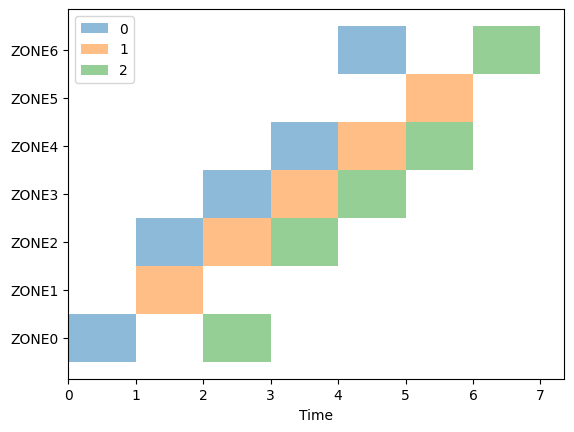

In [10]:
schedule.plot()

In [11]:
schedule.is_a_point_switch(1,2,'ZONE2')
schedule.is_just_after_a_point_switch(1,2,'ZONE3')

True

<Axes: xlabel='Time'>

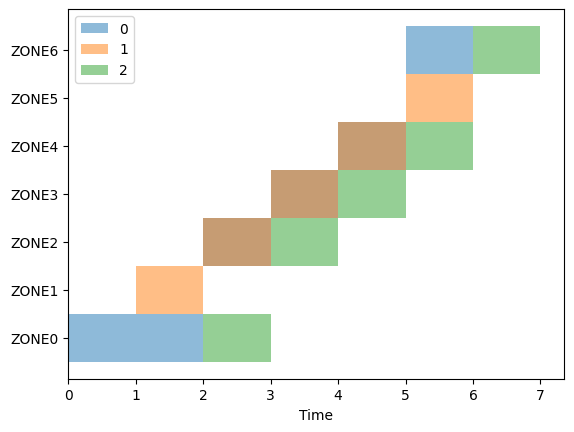

In [12]:
schedule
# add_delay(schedule, 0, 0, 1)
schedule.add_delay( 0, 'ZONE0', 1.).plot()
# add_delay(schedule, 0, 3, 3)

In [13]:
%%time
schedule.num_blocks
schedule.num_trains
schedule.trains

CPU times: user 76 µs, sys: 0 ns, total: 76 µs
Wall time: 79.4 µs


[0, 1, 2]

In [14]:
m = schedule.add_delay(0, 'ZONE0', 1)
m.conflicts(0)

/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


,1,2
ZONE0,NaN,NaN
ZONE1,NaN,NaN
ZONE2,2.0,NaN
ZONE3,3.0,NaN
ZONE4,4.0,NaN
ZONE5,NaN,NaN
ZONE6,NaN,NaN


/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/home/renan/RLway/venv/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


(True, ('ZONE2', 1))

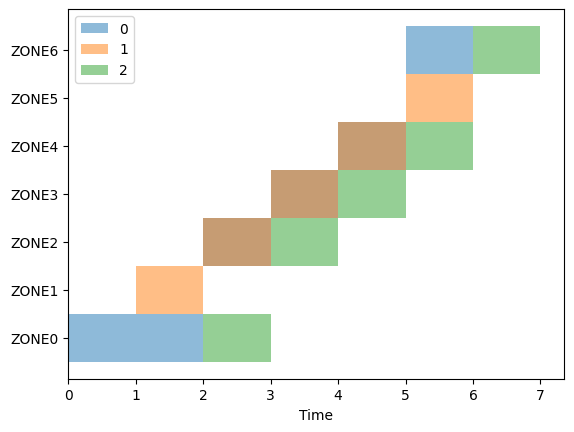

In [15]:
m.plot()
m.has_conflicts(0), m.first_conflict(0)

In [16]:
train1, train2, train3 = 0, 1, 2

<Axes: xlabel='Time'>

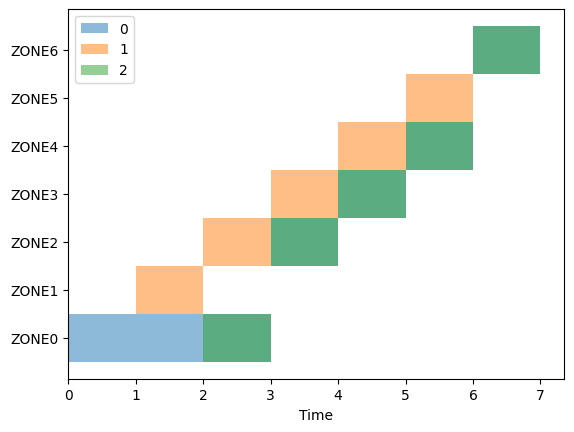

In [17]:
m1 = m.shift_train_after(train1, train2, 'ZONE2')
m1.plot()

3.0

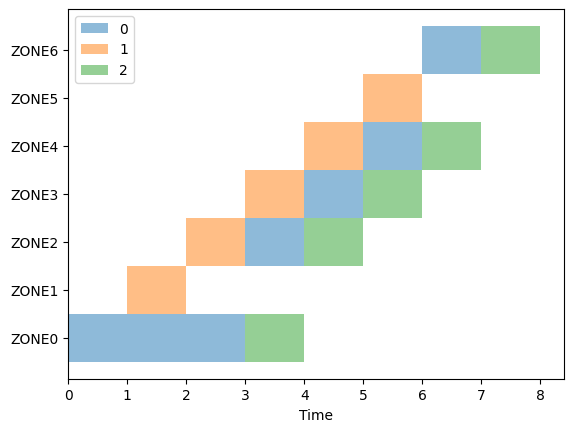

In [18]:
mprime1 = m1.shift_train_after(train3, train1, 'ZONE0')
mprime1.plot()
mprime1.total_delay_at_stations(schedule, ['ZONE5', 'ZONE6'])

<Axes: xlabel='Time'>

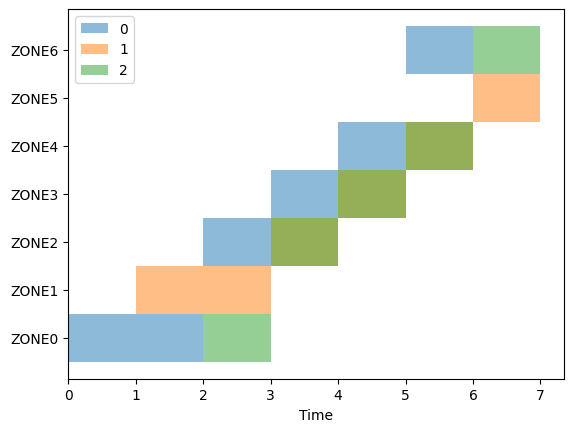

In [19]:
m2=m.shift_train_after(train2, train1, 'ZONE2')
m2.plot()

3.0

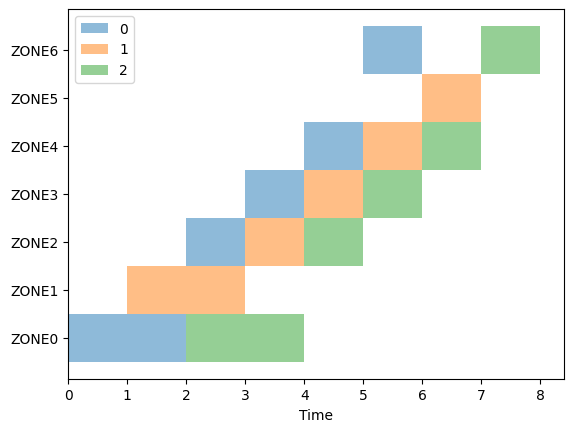

In [20]:
m3=m2.shift_train_after(train3, train2, 'ZONE2')
m3.plot()
m3.total_delay_at_stations(schedule, ['ZONE5','ZONE6'])

3.0

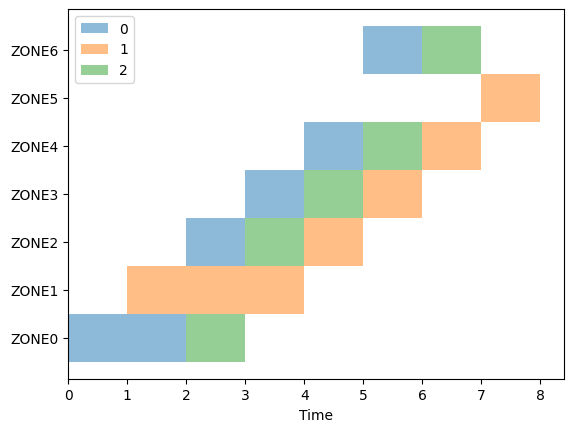

In [21]:
m4=m2.shift_train_after(train2, train3, 'ZONE2')
m4.plot()
m4.total_delay_at_stations(schedule, ['ZONE5','ZONE6'])

In [22]:
%time
m.first_in(0,1,'ZONE2')
schedule.first_in(0, 1, 'ZONE2')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.63 µs


0

# Deux trains, le 2e est plus lent

/home/renan/RLway/src/pyosrd/schedules/schedules.py:430: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for u, v in zip(self.df.index, self.df.fillna(0).values)


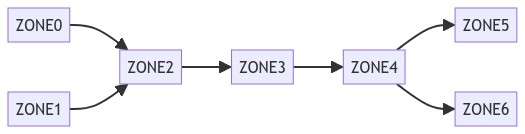

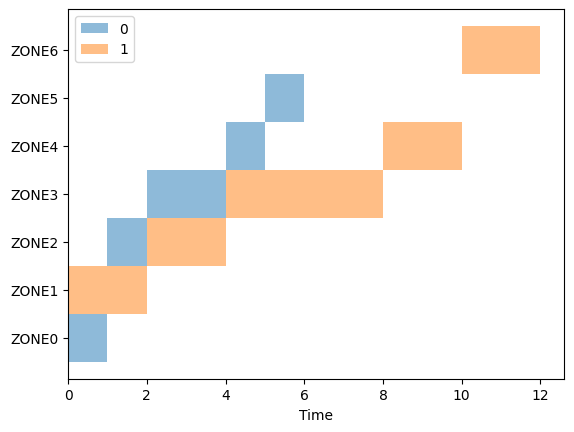

In [23]:
schedule2 = Schedule(6,2)


schedule2.df.at[0, 0] =  [0, 1]
schedule2.df.at[2, 0] =  [1, 2]
schedule2.df.at[3, 0] =  [2, 4]
schedule2.df.at[4, 0] =  [4, 5]
schedule2.df.at[5, 0] =  [5, 6]

schedule2.df.at[1, 1] =  [0, 2]
schedule2.df.at[2, 1] =  [2, 4]
schedule2.df.at[3, 1] =  [4, 8]
schedule2.df.at[4, 1] =  [8, 10]
schedule2.df.at[6, 1] =  [10, 12]

schedule2._df.index = 'ZONE' + schedule2._df.index.astype(str)
schedule2.plot()
schedule2.draw_graph()

<Axes: xlabel='Time'>

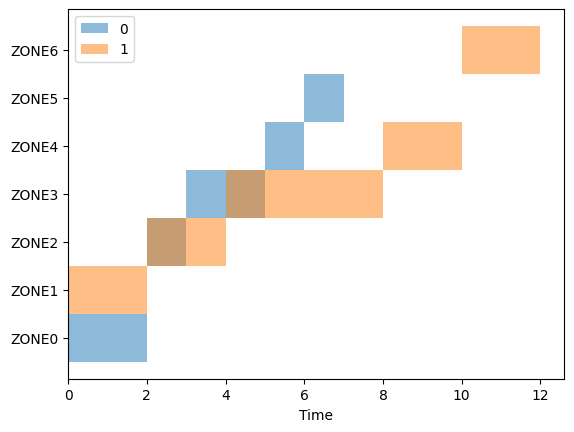

In [24]:
s1 = schedule2.add_delay(0,'ZONE0',1)
s1.plot()


2.0

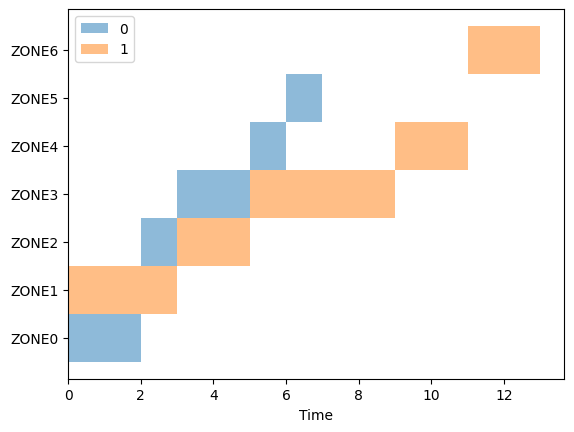

In [25]:
s2 = s1.shift_train_after(1,0,'ZONE2')
s2.plot()
s2.total_delay_at_stations(schedule2, ['ZONE5','ZONE6'])

6.0

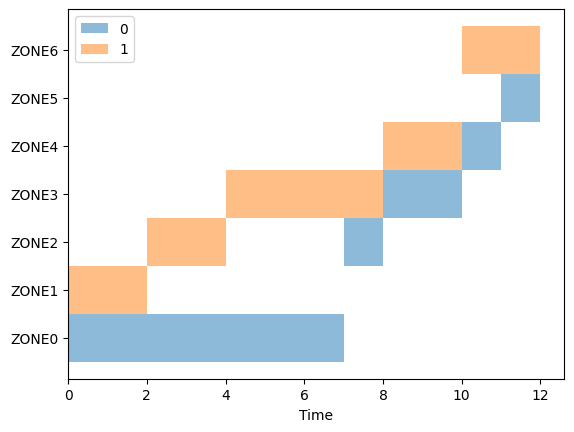

In [26]:
s3 = s1.shift_train_after(0,1,'ZONE2')
s3.plot()
s3.total_delay_at_stations(schedule2, ['ZONE5','ZONE6'])

In [27]:
s2.delays(schedule2).max().loc[0]

1.0

In [28]:
s2.train_delay(0, schedule2)

1.0